importing the dependencies


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images
Test data = 10,000 images

Image dimension 28 x 28
Grayscale image 1 channel. Image pixel range from 0 t0 255 im grayscale. 0 = max black.... 255 = max white

In [ ]:
#printing the 10th image from X_train
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


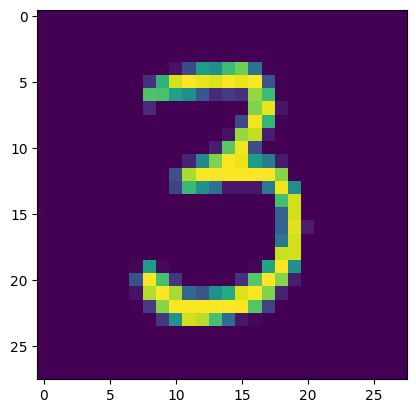

3


In [ ]:
# displaying the image
plt.imshow(X_train[50])
plt.show()

#print the corresponding label
print(Y_train[50])

Image Labels

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding
One Hot Encoding : the proecess of make the particular level related to an image 1 and the other levels as 0

All the images have the same dimension in this dataset, If not, we have to resize all the images to a common dimension

In [ ]:
#scaling the values in range 0 to 1.... because min value in dataset is 0 and maximum value in 255
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural network

In [ ]:
# setting up the layers of the Neural Network

model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')


    ])

In [ ]:
# conpiling the neural network
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
#training the Neural Network
model.fit(X_train, Y_train, epochs = 10) #epochs means how many time your neural network will go through the training data.... with no of epochs the loss function decreases and the accuracy increases

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2985 - accuracy: 0.9139
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1369 - accuracy: 0.9594
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1010 - accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0806 - accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0671 - accuracy: 0.9793
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0572 - accuracy: 0.9822
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0493 - accuracy: 0.9843
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0425 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0379 - accuracy: 0.9877
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.03

training data accuracy is 98.9%

Accuracy on test data

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1008 - accuracy: 0.9739
0.9739000201225281


Test data accuracy = 97.1 %

In [ ]:
print(X_test.shape)

(10000, 28, 28)


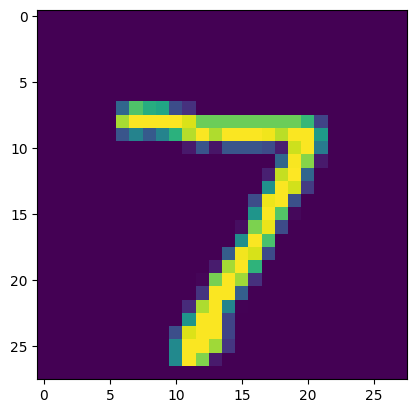

In [ ]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test) #it will predict all the 10000 images from our X_test

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0]) # it will preturn the 10 possible probablity for the image to be in range 0 to 9

[6.9061360e-05 4.5494796e-03 1.0488279e-02 9.9461251e-01 1.2909620e-06
 1.4886735e-01 3.9798529e-11 9.9999958e-01 2.6566045e-02 9.5462137e-01]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
# convertin the prediction probabiliites to class label
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


converting the prediction probabilities to class label for all test data points

In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 5, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(Y_pred)

[[6.9061360e-05 4.5494796e-03 1.0488279e-02 ... 9.9999958e-01
  2.6566045e-02 9.5462137e-01]
 [1.6964389e-09 9.5037848e-01 1.0000000e+00 ... 1.4768633e-03
  1.2064934e-01 6.1660893e-07]
 [9.3823280e-07 9.9977541e-01 1.2786486e-02 ... 5.1754665e-01
  5.4706496e-01 2.6099947e-03]
 ...
 [1.5293087e-12 1.7196330e-04 6.2282568e-10 ... 4.5806754e-02
  7.8265090e-03 9.7709143e-01]
 [4.7365064e-03 2.4407809e-06 1.0006079e-09 ... 5.9792113e-05
  6.7899805e-01 5.7319475e-08]
 [1.8580351e-03 1.0636144e-06 1.9656762e-05 ... 5.1968727e-13
  3.3644360e-02 3.7824345e-06]]


Y_test = True labels

Y_pred_labels = Predicted Labels

In [ ]:
print(Y_pred_labels[0])

7


In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 960    0    2    1    0    9    3    0    4    1]
 [   0 1127    3    2    0    0    0    0    3    0]
 [   1    0 1008    7    1    1    1    6    6    1]
 [   1    0    5  987    0    9    0    4    2    2]
 [   0    0    5    1  958    0    4    3    0   11]
 [   3    0    0    9    1  872    1    0    3    3]
 [   6    2    5    2    4   20  915    0    4    0]
 [   0    4   10    4    1    0    0 1003    1    5]
 [   0    0    5   13    6    4    0    4  934    8]
 [   2    2    0    4   13    7    0    4    2  975]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

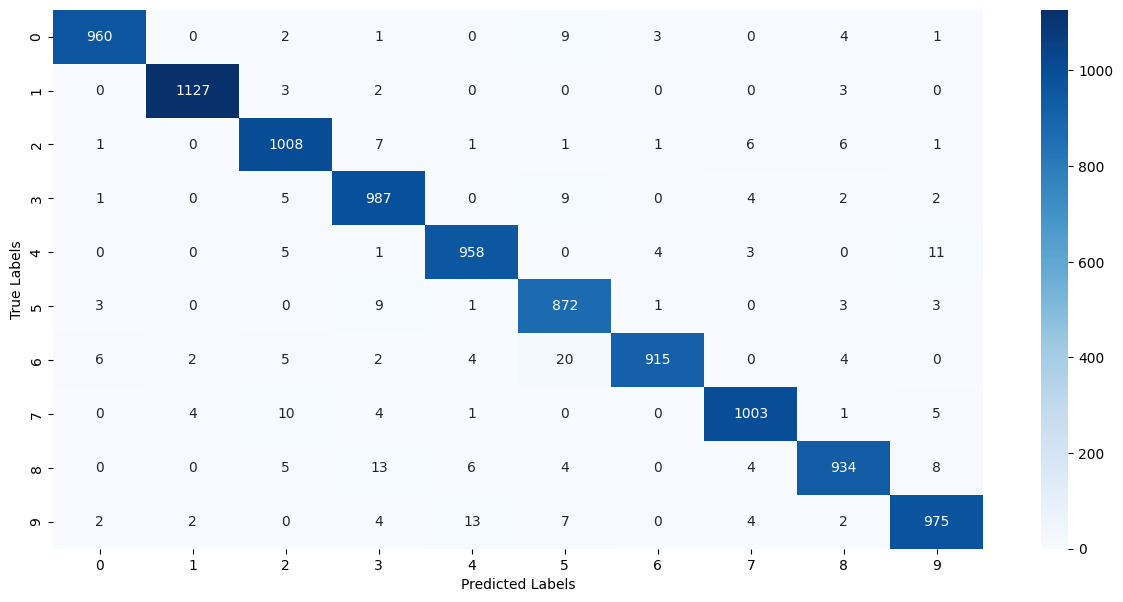

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [ ]:
input_image_path = '/content/mnist digit.png'

input_image = cv2.imread(input_image_path)


In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[198 198 198]
  [198 198 198]
  [  0   0   0]
  ...
  [198 198 198]
  [255 255 255]
  [255 255 255]]

 ...

 [[228 228 228]
  [228 228 228]
  [  0   0   0]
  ...
  [228 228 228]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]]


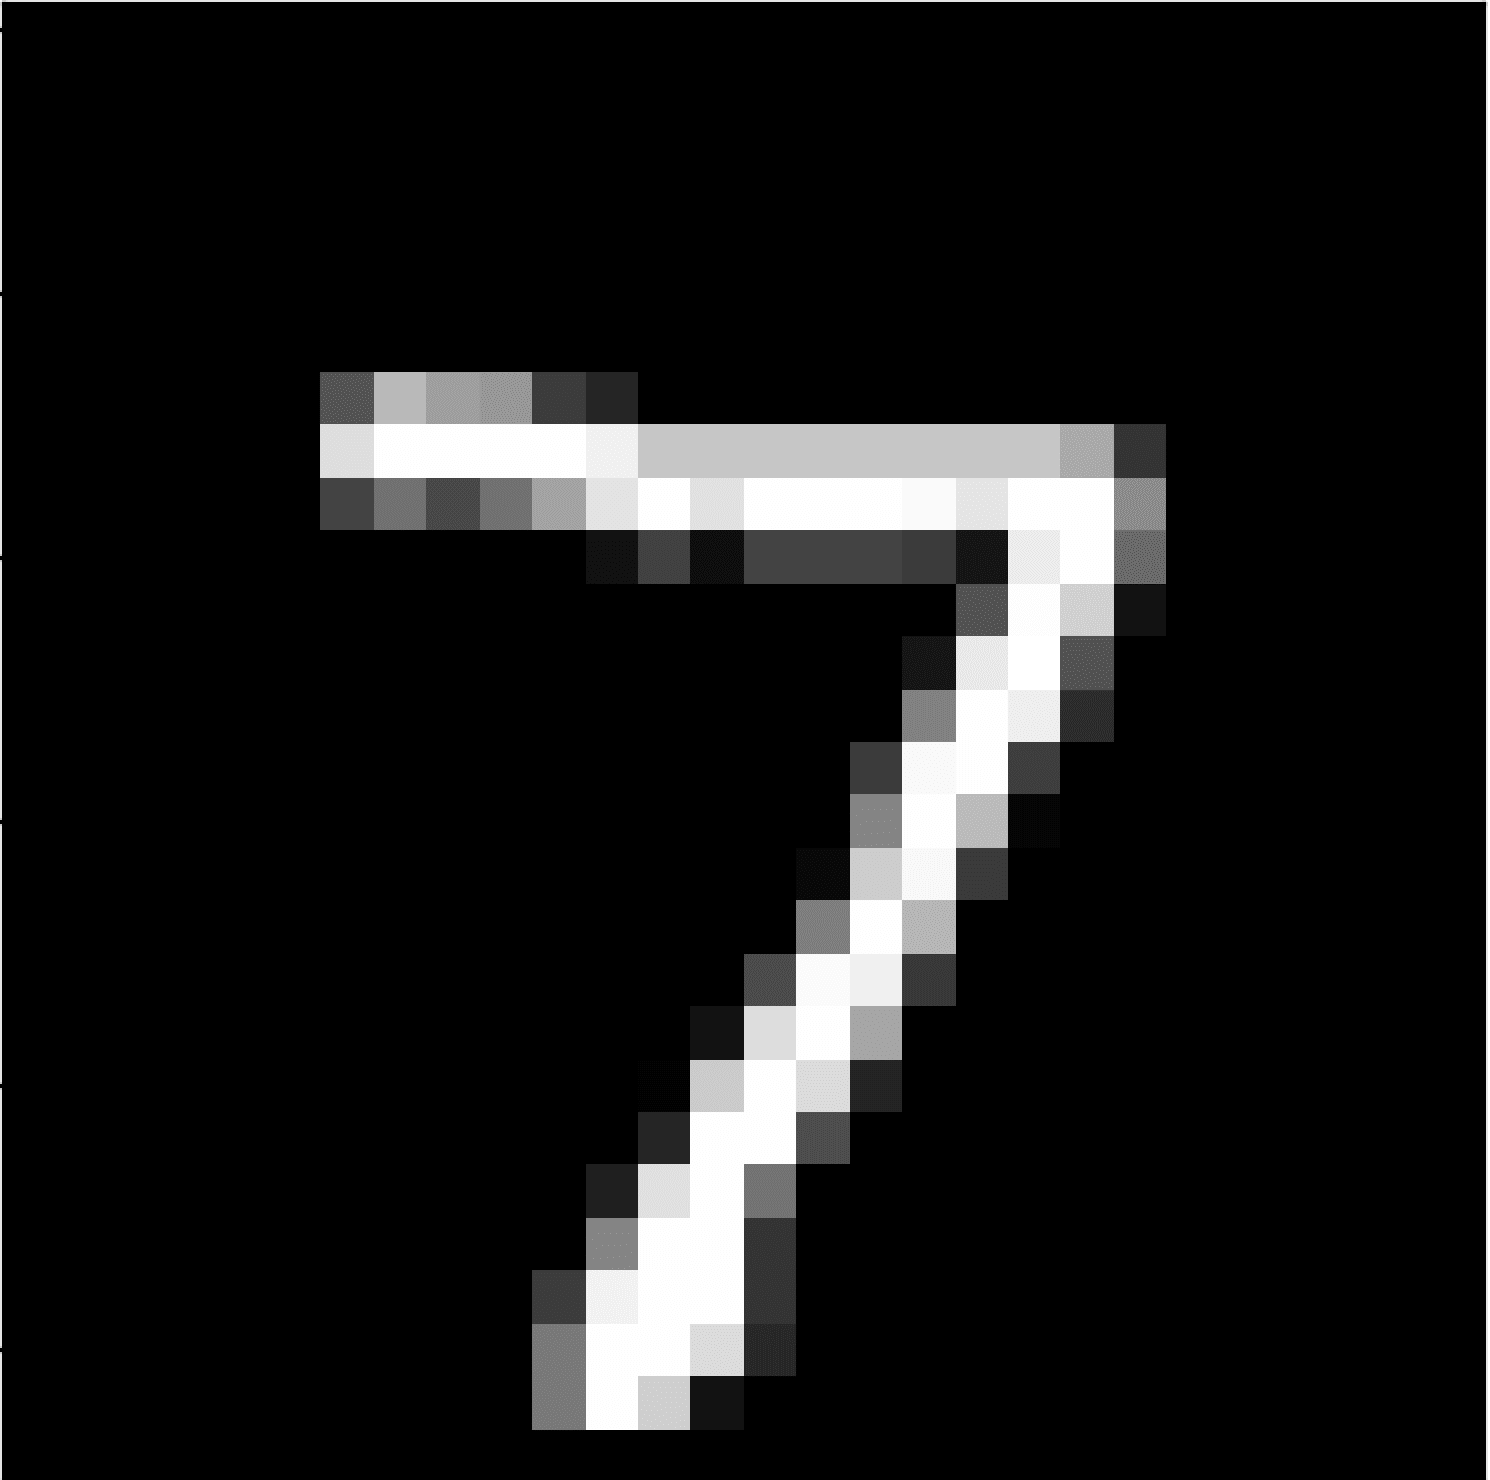

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape #image dimension is 1480, 1490....and it is a rgb 3 image.......so we need to convert this image to 28 , 28 and grascale

(1480, 1490, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
input_image.shape

(1480, 1490, 3)

In [ ]:
grayscale.shape

(1480, 1490)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
type(input_image_resize)

numpy.ndarray

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 40ms/step
[[7.11393077e-05 4.59149620e-03 1.07574975e-02 9.94555175e-01
  1.35656387e-06 1.50538266e-01 4.11981352e-11 9.99999523e-01
  2.63921469e-02 9.55562115e-01]]


In [ ]:
input_prediction_label = np.argmax(input_prediction)
print(input_prediction_label)

7


predictive System

Path of the image to be predicted:/content/mnist digit.png


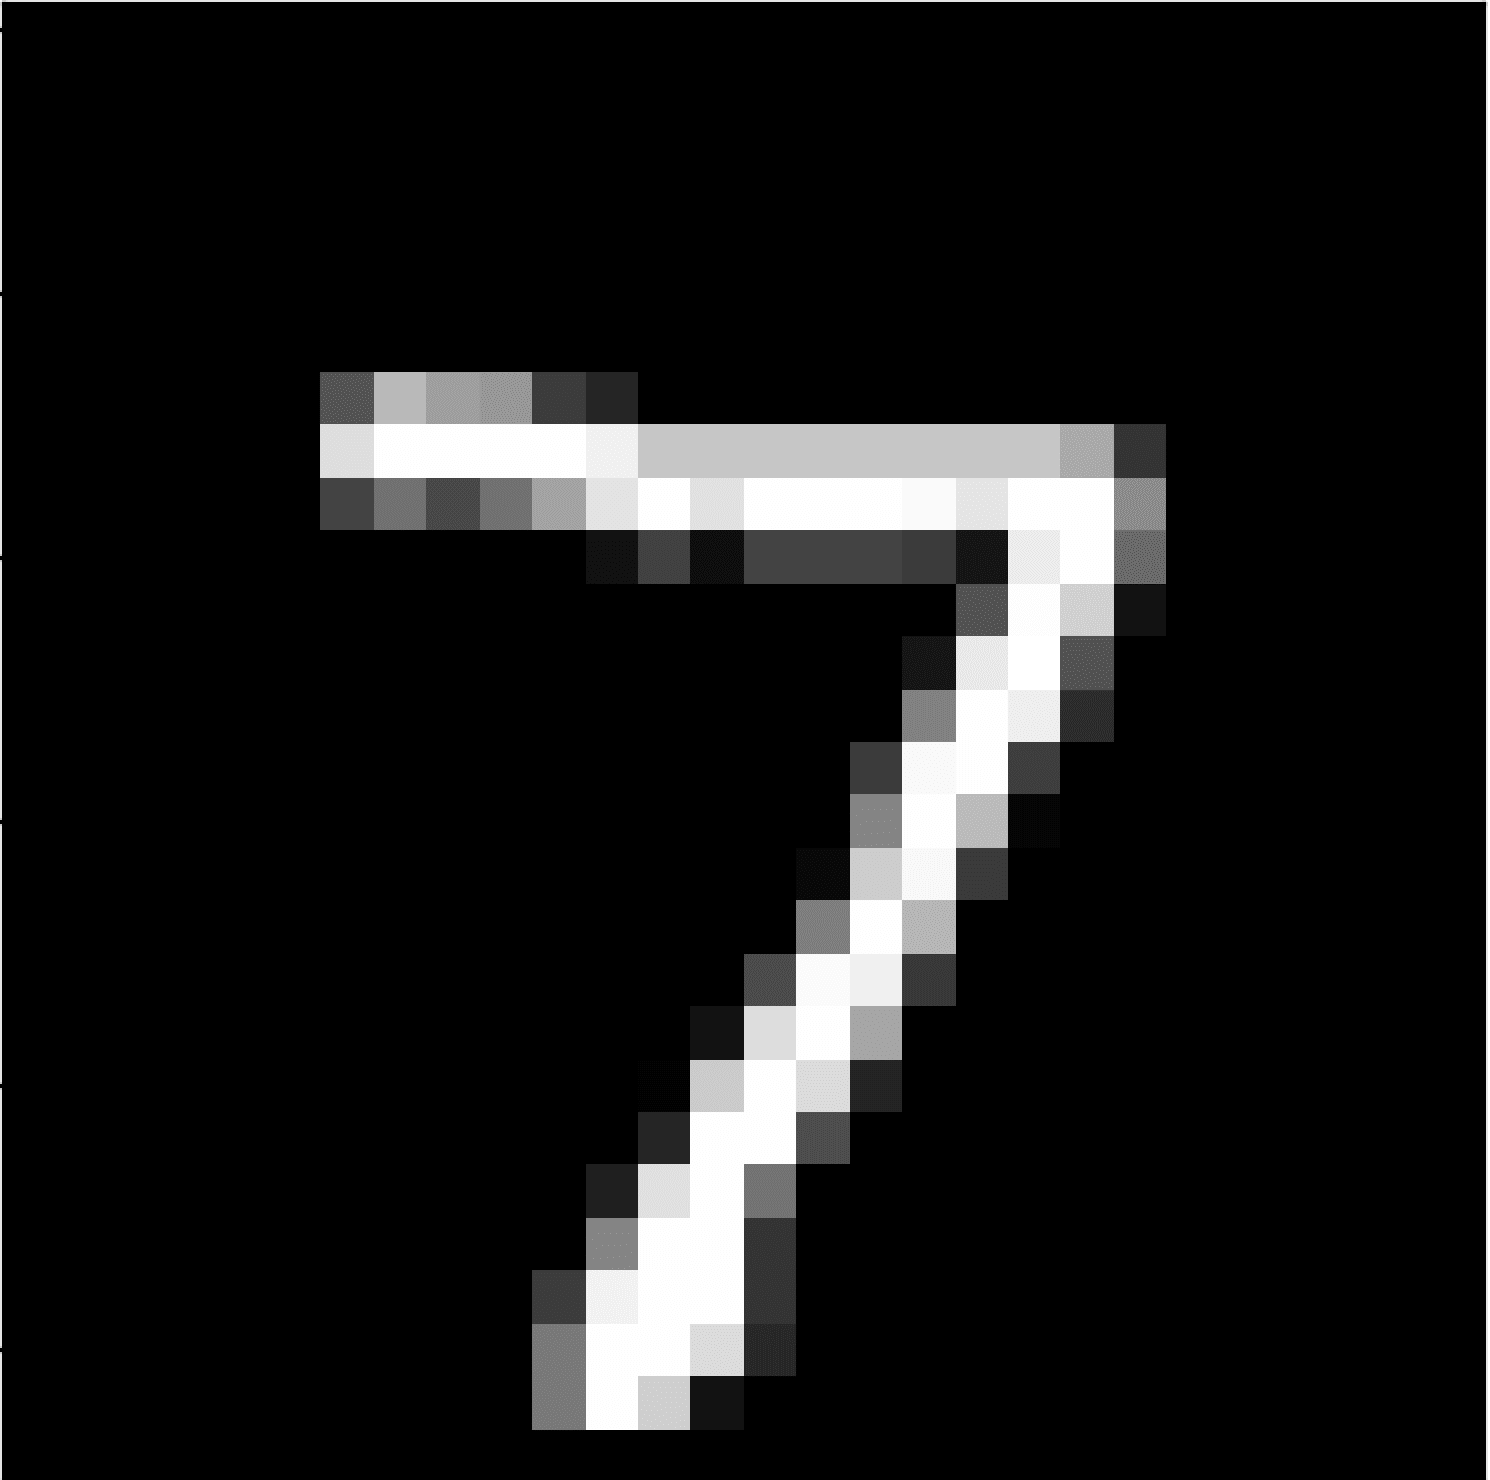

1/1 [==============================] - 0s 24ms/step
the handwritten digit is recognized as: 7


In [ ]:
input_image_path = input('Path of the image to be predicted:')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)


input_prediction_label = np.argmax(input_prediction)

print('the handwritten digit is recognized as:', input_prediction_label)
